# Reminder of what I was doing for drought stuff...

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
from cartopy.mpl.geoaxes import GeoAxes
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from mpl_toolkits.axes_grid1 import AxesGrid
from matplotlib.colors import BoundaryNorm
from matplotlib.colors import LinearSegmentedColormap
import cartopy.feature as cfeature
import matplotlib.mlab as mlab
import cartopy.io.shapereader as shapereader
import cartopy.io.shapereader as shapereader
import xesmf as xe

In [7]:
# # Instructions for regridding using xesmf are here: https://xesmf.readthedocs.io/en/latest/notebooks/Dataset.html
# def regrid_files(ds_to_regrid, ds_target ):
#     # resolution of output: same as cesm-lme
#     ds_out = xr.Dataset({'lat': (['lat'], ds_target.lat),
#                          'lon': (['lon'], ds_target.lon)})

#     regridder = xe.Regridder(ds_to_regrid, ds_out, 'bilinear')
#     regridder.clean_weight_file()

#     ds_out = regridder(ds_to_regrid)
#     for k in ds_to_regrid.data_vars:
#         print(k, ds_out[k].equals(regridder(ds_to_regrid[k])))

#     return ds_out

def regrid_files(ds):
    # resolution of output 3°?
    #[110, 156, -45, -4
#     ds_out = xr.Dataset({'lat': (['lat'], np.arange(-90, 92, 2.5)),
#                          'lon': (['lon'], np.arange(0, 360, 2.5))})
    ds_out = xr.Dataset({'lat': (['lat'], np.arange(-90, 92, 2)),
                         'lon': (['lon'], np.arange(0, 360, 2))})
    
    regridder = xe.Regridder(ds, ds_out, 'bilinear', periodic=False)
#     regridder = xe.Regridder(ds, ds_out, 'bilinear')


    # regridder.clean_weight_file()
    
    ds_out = regridder(ds)
#     for k in ds.data_vars:
#         print(k, ds_out[k].equals(regridder(ds[k])))
        
    return ds_out

In [2]:
# remask Aus

import regionmask

def get_aus(ds):
    mask = regionmask.defined_regions.natural_earth.countries_110.mask(ds)
    ds_aus = ds.where(mask == 137, drop=True)
    return ds_aus

## Import files

... are these the right ones?

In [3]:
input_dir = '../files'
# input_dir = '/Users/nickywright/repos/palaeoclimate-lastmillennium/drought_frequencies/'
input_dir_lm = '%s/lastmillennium_threshold_1900-2000' % (input_dir)

### historical

In [4]:
historical_year = 1900
input_dir_hist = '%s/historical_%s' % (input_dir, historical_year)

ff1_precip_hist_annual  = xr.open_dataset('%s/ff%s_precip_hist_annual.nc' % (input_dir_hist, '1'))
ff2_precip_hist_annual  = xr.open_dataset('%s/ff%s_precip_hist_annual.nc' % (input_dir_hist, '2'))
ff3_precip_hist_annual  = xr.open_dataset('%s/ff%s_precip_hist_annual.nc' % (input_dir_hist, '3'))
ff4_precip_hist_annual  = xr.open_dataset('%s/ff%s_precip_hist_annual.nc' % (input_dir_hist, '4'))
ff5_precip_hist_annual  = xr.open_dataset('%s/ff%s_precip_hist_annual.nc' % (input_dir_hist, '5'))
ff6_precip_hist_annual  = xr.open_dataset('%s/ff%s_precip_hist_annual.nc' % (input_dir_hist, '6'))
ff7_precip_hist_annual  = xr.open_dataset('%s/ff%s_precip_hist_annual.nc' % (input_dir_hist, '7'))
ff8_precip_hist_annual  = xr.open_dataset('%s/ff%s_precip_hist_annual.nc' % (input_dir_hist, '8'))
ff9_precip_hist_annual  = xr.open_dataset('%s/ff%s_precip_hist_annual.nc' % (input_dir_hist, '9'))
ff10_precip_hist_annual = xr.open_dataset('%s/ff%s_precip_hist_annual.nc' % (input_dir_hist, '10'))
ff11_precip_hist_annual = xr.open_dataset('%s/ff%s_precip_hist_annual.nc' % (input_dir_hist, '11'))
ff12_precip_hist_annual = xr.open_dataset('%s/ff%s_precip_hist_annual.nc' % (input_dir_hist, '12'))
ff13_precip_hist_annual = xr.open_dataset('%s/ff%s_precip_hist_annual.nc' % (input_dir_hist, '13'))
 
bcc_precip_hist_annual        = xr.open_dataset('%s/bcc_precip_hist_annual.nc' % input_dir_hist)
ccsm4_precip_hist_annual      = xr.open_dataset('%s/ccsm4_precip_hist_annual.nc' % input_dir_hist)
csiro_mk3l_precip_hist_annual = xr.open_dataset('%s/csiro_mk3l_precip_hist_annual.nc' % input_dir_hist)
fgoals_gl_precip_hist_annual  = xr.open_dataset('%s/fgoals_gl_precip_hist_annual.nc' % input_dir_hist)
fgoals_s2_precip_hist_annual  = xr.open_dataset('%s/fgoals_s2_precip_hist_annual.nc' % input_dir_hist)
giss_21_precip_hist_annual  = xr.open_dataset('%s/giss_21_precip_hist_annual.nc' % input_dir_hist)
giss_22_precip_hist_annual  = xr.open_dataset('%s/giss_22_precip_hist_annual.nc' % input_dir_hist)
giss_23_precip_hist_annual  = xr.open_dataset('%s/giss_23_precip_hist_annual.nc' % input_dir_hist)
giss_24_precip_hist_annual  = xr.open_dataset('%s/giss_24_precip_hist_annual.nc' % input_dir_hist)
giss_25_precip_hist_annual  = xr.open_dataset('%s/giss_25_precip_hist_annual.nc' % input_dir_hist)
giss_26_precip_hist_annual  = xr.open_dataset('%s/giss_26_precip_hist_annual.nc' % input_dir_hist)
giss_27_precip_hist_annual  = xr.open_dataset('%s/giss_27_precip_hist_annual.nc' % input_dir_hist)
giss_28_precip_hist_annual  = xr.open_dataset('%s/giss_28_precip_hist_annual.nc' % input_dir_hist)
hadcm3_precip_hist_annual   = xr.open_dataset('%s/hadcm3_precip_hist_annual.nc' % input_dir_hist)
ipsl_precip_hist_annual     = xr.open_dataset('%s/ipsl_precip_hist_annual.nc' % input_dir_hist)
miroc_precip_hist_annual    = xr.open_dataset('%s/miroc_precip_hist_annual.nc' % input_dir_hist)
mpi_precip_hist_annual      = xr.open_dataset('%s/mpi_precip_hist_annual.nc' % input_dir_hist)
mri_precip_hist_annual      = xr.open_dataset('%s/mri_precip_hist_annual.nc' % input_dir_hist)

# ensemble means
ff_all_precip_hist_annual = xr.concat([ff1_precip_hist_annual, ff2_precip_hist_annual, 
                                           ff3_precip_hist_annual, ff4_precip_hist_annual, 
                                           ff5_precip_hist_annual, ff6_precip_hist_annual,
                                           ff7_precip_hist_annual, ff8_precip_hist_annual,
                                           ff9_precip_hist_annual, ff10_precip_hist_annual, 
                                           ff11_precip_hist_annual, ff12_precip_hist_annual, 
                                           ff13_precip_hist_annual], dim='en')
ff_all_precip_hist_annual_mean = ff_all_precip_hist_annual.mean(dim='en')

giss_all_precip_hist_annual = xr.concat([giss_21_precip_hist_annual, giss_22_precip_hist_annual,
                                             giss_23_precip_hist_annual, giss_24_precip_hist_annual,
                                             giss_25_precip_hist_annual, giss_26_precip_hist_annual,
                                             giss_27_precip_hist_annual, giss_28_precip_hist_annual], dim='en')

giss_all_precip_hist_annual_mean = giss_all_precip_hist_annual.mean(dim='en')

get rid of unneeded bounds

In [5]:
bcc_precip_hist_annual = bcc_precip_hist_annual.drop(('lat_bnds', 'lon_bnds'))
ccsm4_precip_hist_annual = ccsm4_precip_hist_annual.drop(('lat_bnds', 'lon_bnds'))
csiro_mk3l_precip_hist_annual = csiro_mk3l_precip_hist_annual.drop(('lat_bnds', 'lon_bnds'))
fgoals_gl_precip_hist_annual = fgoals_gl_precip_hist_annual.drop(('lat_bnds', 'lon_bnds'))
fgoals_s2_precip_hist_annual = fgoals_s2_precip_hist_annual.drop(('lat_bnds', 'lon_bnds'))
giss_28_precip_hist_annual = giss_28_precip_hist_annual.drop(('lat_bnds', 'lon_bnds'))
hadcm3_precip_hist_annual = hadcm3_precip_hist_annual.drop(('lat_bnds', 'lon_bnds'))
ipsl_precip_hist_annual = ipsl_precip_hist_annual.drop(('lat_bnds', 'lon_bnds'))
miroc_precip_hist_annual = miroc_precip_hist_annual.drop(('lat_bnds', 'lon_bnds'))
mpi_precip_hist_annual = mpi_precip_hist_annual.drop(('lat_bnds', 'lon_bnds'))
mri_precip_hist_annual = mri_precip_hist_annual.drop(('lat_bnds', 'lon_bnds'))

## Regrid things

In [8]:
bcc_precip_hist_annual_rg        = regrid_files(bcc_precip_hist_annual)
ccsm4_precip_hist_annual_rg      = regrid_files(ccsm4_precip_hist_annual)
csiro_mk3l_precip_hist_annual_rg = regrid_files(csiro_mk3l_precip_hist_annual)
fgoals_gl_precip_hist_annual_rg  = regrid_files(fgoals_gl_precip_hist_annual)
fgoals_s2_precip_hist_annual_rg  = regrid_files(fgoals_s2_precip_hist_annual)
giss_28_precip_hist_annual_rg    = regrid_files(giss_28_precip_hist_annual)
hadcm3_precip_hist_annual_rg     = regrid_files(hadcm3_precip_hist_annual)
ipsl_precip_hist_annual_rg       = regrid_files(ipsl_precip_hist_annual)
miroc_precip_hist_annual_rg      = regrid_files(miroc_precip_hist_annual)
mpi_precip_hist_annual_rg        = regrid_files(mpi_precip_hist_annual)
mri_precip_hist_annual_rg        = regrid_files(mri_precip_hist_annual)
ff2_precip_hist_annual_rg = regrid_files(ff2_precip_hist_annual)

merge into one dataset

In [9]:
bcc_precip_hist_annual_rg        = bcc_precip_hist_annual_rg.drop('pr')
ccsm4_precip_hist_annual_rg      = ccsm4_precip_hist_annual_rg.drop('pr')
csiro_mk3l_precip_hist_annual_rg = csiro_mk3l_precip_hist_annual_rg.drop('pr') 
fgoals_gl_precip_hist_annual_rg  = fgoals_gl_precip_hist_annual_rg.drop('pr')
fgoals_s2_precip_hist_annual_rg  = fgoals_s2_precip_hist_annual_rg.drop('pr')
giss_28_precip_hist_annual_rg    = giss_28_precip_hist_annual_rg.drop('pr')
hadcm3_precip_hist_annual_rg     = hadcm3_precip_hist_annual_rg.drop('pr')
ipsl_precip_hist_annual_rg       = ipsl_precip_hist_annual_rg.drop('pr')
miroc_precip_hist_annual_rg      = miroc_precip_hist_annual_rg.drop('pr')
mpi_precip_hist_annual_rg        = mpi_precip_hist_annual_rg.drop('pr')
mri_precip_hist_annual_rg        = mri_precip_hist_annual_rg.drop('pr')


In [10]:
hist_merged = xr.concat([bcc_precip_hist_annual_rg, 
                         ccsm4_precip_hist_annual_rg,  
                         csiro_mk3l_precip_hist_annual_rg,  
                         fgoals_gl_precip_hist_annual_rg,  
                         fgoals_s2_precip_hist_annual_rg, 
                         giss_28_precip_hist_annual_rg,   
                         hadcm3_precip_hist_annual_rg, 
                         ipsl_precip_hist_annual_rg, 
                         miroc_precip_hist_annual_rg,  
                         mpi_precip_hist_annual_rg,  
                         mri_precip_hist_annual_rg, 
                         ff2_precip_hist_annual_rg], dim='model')

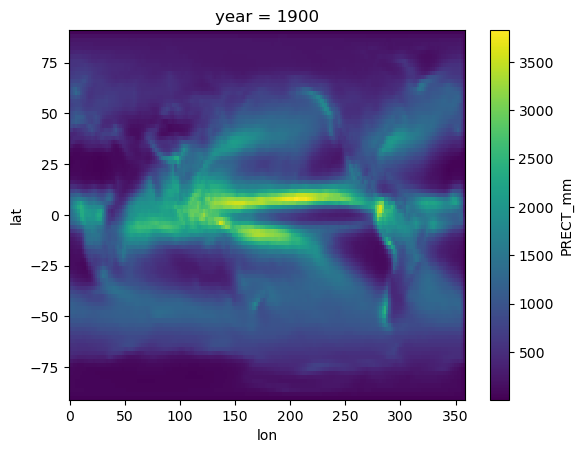

In [11]:
hist_merged.PRECT_mm[:,0,:,:].mean(dim='model').plot()

In [12]:
hist_merged

<xarray.Dataset>
Dimensions:                           (year: 101, lat: 91, lon: 180, model: 12)
Coordinates:
  * year                              (year) int64 1900 1901 1902 ... 1999 2000
  * lat                               (lat) int64 -90 -88 -86 -84 ... 86 88 90
  * lon                               (lon) int64 0 2 4 6 8 ... 352 354 356 358
Dimensions without coordinates: model
Data variables: (12/42)
    PRECT                             (year, lat, lon) float32 2.477e-08 ... ...
    PRECT_mm                          (model, year, lat, lon) float64 0.0 ......
    drought_years_2s2e                (model, year, lat, lon) float64 0.0 ......
    drought_years_median              (model, year, lat, lon) float64 0.0 ......
    drought_years_20perc              (model, year, lat, lon) float64 0.0 ......
    drought_years_120pc_2med          (model, year, lat, lon) float64 0.0 ......
    ...                                ...
    droughts_220pc_1med_intensity     (model, year, lat, lon) float64 0.0 ......
    droughts_2s2e_severity            (model, year, lat, lon) float64 0.0 ......
    droughts_median_severity          (model, year, lat, lon) float64 0.0 ......
    droughts_20perc_severity          (model, year, lat, lon) float64 0.0 ......
    droughts_120pc_2med_severity      (model, year, lat, lon) float64 0.0 ......
    droughts_220pc_1med_severity      (model, year, lat, lon) float64 0.0 ......
Attributes:
    regrid_method:  bilinear

In [13]:
hist_merged_aus = get_aus(hist_merged)

/Users/nickywright/miniconda3/envs/py38-x86/lib/python3.8/site-packages/regionmask/defined_regions/_natural_earth.py:471: FutureWarning: ``regionmask.defined_regions.natural_earth`` is deprecated. Please use ``regionmask.defined_regions.natural_earth_v4_1_0`` or ``regionmask.defined_regions.natural_earth_v5_0_0`` instead.
  warnings.warn(


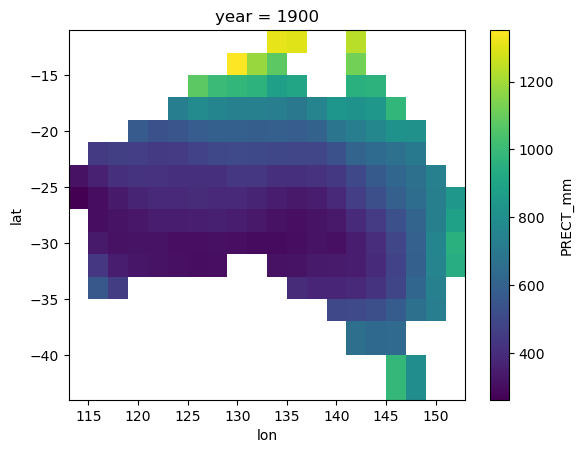

In [14]:
hist_merged_aus.PRECT_mm[:,0,:,:].mean(dim='model').plot()

In [15]:
# hist_merged.to_netcdf('%s/hist_merged_regridded.nc' % input_dir_hist) # 2.5°
hist_merged.to_netcdf('%s/hist_merged_regridded_2deg.nc' % input_dir_hist) # 2°

In [16]:
# hist_merged_aus.to_netcdf('%s/hist_merged_regridded_aus.nc' % input_dir_hist) # 2.5°
hist_merged_aus.to_netcdf('%s/hist_merged_regridded_aus_2deg.nc' % input_dir_hist) # 2°

## last millennium

In [17]:
ff1_precip_lm_annual  = xr.open_dataset('%s/ff%s_precip_lm_annual.nc' % (input_dir_lm, '1'))
ff2_precip_lm_annual  = xr.open_dataset('%s/ff%s_precip_lm_annual.nc' % (input_dir_lm, '2'))
ff3_precip_lm_annual  = xr.open_dataset('%s/ff%s_precip_lm_annual.nc' % (input_dir_lm, '3'))
ff4_precip_lm_annual  = xr.open_dataset('%s/ff%s_precip_lm_annual.nc' % (input_dir_lm, '4'))
ff5_precip_lm_annual  = xr.open_dataset('%s/ff%s_precip_lm_annual.nc' % (input_dir_lm, '5'))
ff6_precip_lm_annual  = xr.open_dataset('%s/ff%s_precip_lm_annual.nc' % (input_dir_lm, '6'))
ff7_precip_lm_annual  = xr.open_dataset('%s/ff%s_precip_lm_annual.nc' % (input_dir_lm, '7'))
ff8_precip_lm_annual  = xr.open_dataset('%s/ff%s_precip_lm_annual.nc' % (input_dir_lm, '8'))
ff9_precip_lm_annual  = xr.open_dataset('%s/ff%s_precip_lm_annual.nc' % (input_dir_lm, '9'))
ff10_precip_lm_annual = xr.open_dataset('%s/ff%s_precip_lm_annual.nc' % (input_dir_lm, '10'))
ff11_precip_lm_annual = xr.open_dataset('%s/ff%s_precip_lm_annual.nc' % (input_dir_lm, '11'))
ff12_precip_lm_annual = xr.open_dataset('%s/ff%s_precip_lm_annual.nc' % (input_dir_lm, '12'))
ff13_precip_lm_annual = xr.open_dataset('%s/ff%s_precip_lm_annual.nc' % (input_dir_lm, '13'))
 
bcc_precip_lm_annual        = xr.open_dataset('%s/bcc_precip_lm_annual.nc' % input_dir_lm)
ccsm4_precip_lm_annual      = xr.open_dataset('%s/ccsm4_precip_lm_annual.nc' % input_dir_lm)
csiro_mk3l_precip_lm_annual = xr.open_dataset('%s/csiro_mk3l_precip_lm_annual.nc' % input_dir_lm)
fgoals_gl_precip_lm_annual  = xr.open_dataset('%s/fgoals_gl_precip_lm_annual.nc' % input_dir_lm)
fgoals_s2_precip_lm_annual  = xr.open_dataset('%s/fgoals_s2_precip_lm_annual.nc' % input_dir_lm)
giss_21_precip_lm_annual    = xr.open_dataset('%s/giss_21_precip_lm_annual.nc' % input_dir_lm)
giss_22_precip_lm_annual    = xr.open_dataset('%s/giss_22_precip_lm_annual.nc' % input_dir_lm)
giss_23_precip_lm_annual    = xr.open_dataset('%s/giss_23_precip_lm_annual.nc' % input_dir_lm)
giss_24_precip_lm_annual    = xr.open_dataset('%s/giss_24_precip_lm_annual.nc' % input_dir_lm)
giss_25_precip_lm_annual    = xr.open_dataset('%s/giss_25_precip_lm_annual.nc' % input_dir_lm)
giss_26_precip_lm_annual    = xr.open_dataset('%s/giss_26_precip_lm_annual.nc' % input_dir_lm)
giss_27_precip_lm_annual    = xr.open_dataset('%s/giss_27_precip_lm_annual.nc' % input_dir_lm)
giss_28_precip_lm_annual    = xr.open_dataset('%s/giss_28_precip_lm_annual.nc' % input_dir_lm)
hadcm3_precip_lm_annual     = xr.open_dataset('%s/hadcm3_precip_lm_annual.nc' % input_dir_lm)
ipsl_precip_lm_annual       = xr.open_dataset('%s/ipsl_precip_lm_annual.nc' % input_dir_lm)
miroc_precip_lm_annual      = xr.open_dataset('%s/miroc_precip_lm_annual.nc' % input_dir_lm)
mpi_precip_lm_annual        = xr.open_dataset('%s/mpi_precip_lm_annual.nc' % input_dir_lm)
mri_precip_lm_annual        = xr.open_dataset('%s/mri_precip_lm_annual.nc' % input_dir_lm)

# ensemble means
ff_all_precip_lm_annual = xr.concat([ff1_precip_lm_annual, ff2_precip_lm_annual, 
                                     ff3_precip_lm_annual, ff4_precip_lm_annual, 
                                     ff5_precip_lm_annual, ff6_precip_lm_annual,
                                     ff7_precip_lm_annual, ff8_precip_lm_annual,
                                     ff9_precip_lm_annual, ff10_precip_lm_annual, 
                                     ff11_precip_lm_annual, ff12_precip_lm_annual, 
                                     ff13_precip_lm_annual], dim='en')
ff_all_precip_lm_annual_mean = ff_all_precip_lm_annual.mean(dim='en')

giss_all_precip_lm_annual = xr.concat([giss_21_precip_lm_annual, giss_22_precip_lm_annual,
                                       giss_23_precip_lm_annual, giss_24_precip_lm_annual,
                                       giss_25_precip_lm_annual, giss_26_precip_lm_annual,
                                       giss_27_precip_lm_annual, giss_28_precip_lm_annual], dim='en')

giss_all_precip_lm_annual_mean = giss_all_precip_lm_annual.mean(dim='en')

### redo just australia using 850-1850 lm only

In [18]:
# ext = '_pre1850'

# # ff1_precip_lm_annual  = xr.open_dataset('%s/ff%s_precip_lm_annual%s.nc' % (input_dir_lm, '1', ext))
# ff2_precip_lm_annual  = xr.open_dataset('%s/ff%s_precip_lm_annual%s.nc' % (input_dir_lm, '2', ext))
# # ff3_precip_lm_annual  = xr.open_dataset('%s/ff%s_precip_lm_annual%s.nc' % (input_dir_lm, '3', ext))
# # ff4_precip_lm_annual  = xr.open_dataset('%s/ff%s_precip_lm_annual%s.nc' % (input_dir_lm, '4', ext))
# # ff5_precip_lm_annual  = xr.open_dataset('%s/ff%s_precip_lm_annual%s.nc' % (input_dir_lm, '5', ext))
# # ff6_precip_lm_annual  = xr.open_dataset('%s/ff%s_precip_lm_annual%s.nc' % (input_dir_lm, '6', ext))
# # ff7_precip_lm_annual  = xr.open_dataset('%s/ff%s_precip_lm_annual%s.nc' % (input_dir_lm, '7', ext))
# # ff8_precip_lm_annual  = xr.open_dataset('%s/ff%s_precip_lm_annual%s.nc' % (input_dir_lm, '8', ext))
# # ff9_precip_lm_annual  = xr.open_dataset('%s/ff%s_precip_lm_annual%s.nc' % (input_dir_lm, '9', ext))
# # ff10_precip_lm_annual = xr.open_dataset('%s/ff%s_precip_lm_annual%s.nc' % (input_dir_lm, '10', ext))
# # ff11_precip_lm_annual = xr.open_dataset('%s/ff%s_precip_lm_annual%s.nc' % (input_dir_lm, '11', ext))
# # ff12_precip_lm_annual = xr.open_dataset('%s/ff%s_precip_lm_annual%s.nc' % (input_dir_lm, '12', ext))
# # ff13_precip_lm_annual = xr.open_dataset('%s/ff%s_precip_lm_annual%s.nc' % (input_dir_lm, '13', ext))
 
# bcc_precip_lm_annual        = xr.open_dataset('%s/bcc_precip_lm_annual%s.nc' % (input_dir_lm, ext))
# ccsm4_precip_lm_annual      = xr.open_dataset('%s/ccsm4_precip_lm_annual%s.nc' % (input_dir_lm, ext))
# csiro_mk3l_precip_lm_annual = xr.open_dataset('%s/csiro_mk3l_precip_lm_annual%s.nc' % (input_dir_lm, ext))
# fgoals_gl_precip_lm_annual  = xr.open_dataset('%s/fgoals_gl_precip_lm_annual%s.nc' % (input_dir_lm, ext))
# fgoals_s2_precip_lm_annual  = xr.open_dataset('%s/fgoals_s2_precip_lm_annual%s.nc' % (input_dir_lm, ext))
# # giss_21_precip_lm_annual    = xr.open_dataset('%s/giss_21_precip_lm_annual%s.nc' % (input_dir_lm, ext))
# # giss_22_precip_lm_annual    = xr.open_dataset('%s/giss_22_precip_lm_annual%s.nc' % (input_dir_lm, ext))
# # giss_23_precip_lm_annual    = xr.open_dataset('%s/giss_23_precip_lm_annual%s.nc' % (input_dir_lm, ext))
# # giss_24_precip_lm_annual    = xr.open_dataset('%s/giss_24_precip_lm_annual%s.nc' % (input_dir_lm, ext))
# # giss_25_precip_lm_annual    = xr.open_dataset('%s/giss_25_precip_lm_annual%s.nc' % (input_dir_lm, ext))
# # giss_26_precip_lm_annual    = xr.open_dataset('%s/giss_26_precip_lm_annual%s.nc' % (input_dir_lm, ext))
# # giss_27_precip_lm_annual    = xr.open_dataset('%s/giss_27_precip_lm_annual%s.nc' % (input_dir_lm, ext))
# giss_28_precip_lm_annual    = xr.open_dataset('%s/giss_28_precip_lm_annual%s.nc' % (input_dir_lm, ext))
# hadcm3_precip_lm_annual     = xr.open_dataset('%s/hadcm3_precip_lm_annual%s.nc' % (input_dir_lm, ext))
# ipsl_precip_lm_annual       = xr.open_dataset('%s/ipsl_precip_lm_annual%s.nc' % (input_dir_lm, ext))
# miroc_precip_lm_annual      = xr.open_dataset('%s/miroc_precip_lm_annual%s.nc' % (input_dir_lm, ext))
# mpi_precip_lm_annual        = xr.open_dataset('%s/mpi_precip_lm_annual%s.nc' % (input_dir_lm, ext))
# mri_precip_lm_annual        = xr.open_dataset('%s/mri_precip_lm_annual%s.nc' % (input_dir_lm, ext))

# # # ensemble means
# # ff_all_precip_lm_annual = xr.concat([ff1_precip_lm_annual, ff2_precip_lm_annual, 
# #                                      ff3_precip_lm_annual, ff4_precip_lm_annual, 
# #                                      ff5_precip_lm_annual, ff6_precip_lm_annual,
# #                                      ff7_precip_lm_annual, ff8_precip_lm_annual,
# #                                      ff9_precip_lm_annual, ff10_precip_lm_annual, 
# #                                      ff11_precip_lm_annual, ff12_precip_lm_annual, 
# #                                      ff13_precip_lm_annual], dim='en')
# # ff_all_precip_lm_annual_mean = ff_all_precip_lm_annual.mean(dim='en')

# # giss_all_precip_lm_annual = xr.concat([giss_21_precip_lm_annual, giss_22_precip_lm_annual,
# #                                        giss_23_precip_lm_annual, giss_24_precip_lm_annual,
# #                                        giss_25_precip_lm_annual, giss_26_precip_lm_annual,
# #                                        giss_27_precip_lm_annual, giss_28_precip_lm_annual], dim='en')

# # giss_all_precip_lm_annual_mean = giss_all_precip_lm_annual.mean(dim='en')

In [19]:
bcc_precip_lm_annual = bcc_precip_lm_annual.drop(('lat_bnds', 'lon_bnds'))
ccsm4_precip_lm_annual = ccsm4_precip_lm_annual.drop(('lat_bnds', 'lon_bnds'))
csiro_mk3l_precip_lm_annual = csiro_mk3l_precip_lm_annual.drop(('lat_bnds', 'lon_bnds'))
fgoals_gl_precip_lm_annual = fgoals_gl_precip_lm_annual.drop(('lat_bnds', 'lon_bnds'))
fgoals_s2_precip_lm_annual = fgoals_s2_precip_lm_annual.drop(('lat_bnds', 'lon_bnds'))
giss_28_precip_lm_annual = giss_28_precip_lm_annual.drop(('lat_bnds', 'lon_bnds'))
hadcm3_precip_lm_annual = hadcm3_precip_lm_annual.drop(('lat_bnds', 'lon_bnds'))
ipsl_precip_lm_annual = ipsl_precip_lm_annual.drop(('lat_bnds', 'lon_bnds'))
miroc_precip_lm_annual = miroc_precip_lm_annual.drop(('lat_bnds', 'lon_bnds'))
mpi_precip_lm_annual = mpi_precip_lm_annual.drop(('lat_bnds', 'lon_bnds'))
mri_precip_lm_annual = mri_precip_lm_annual.drop(('lat_bnds', 'lon_bnds'))

In [20]:
bcc_precip_lm_annual

<xarray.Dataset>
Dimensions:                           (year: 1151, lat: 64, lon: 128)
Coordinates:
  * lat                               (lat) float64 -87.86 -85.1 ... 85.1 87.86
  * lon                               (lon) float64 0.0 2.812 ... 354.4 357.2
  * year                              (year) int64 850 851 852 ... 1999 2000
Data variables: (12/42)
    pr                                (year, lat, lon) float32 ...
    PRECT_mm                          (year, lat, lon) float64 ...
    drought_years_2s2e                (year, lat, lon) int64 ...
    drought_years_median              (year, lat, lon) float64 ...
    drought_years_20perc              (year, lat, lon) float64 ...
    drought_years_120pc_2med          (year, lat, lon) int64 ...
    ...                                ...
    droughts_220pc_1med_intensity     (year, lat, lon) float64 ...
    droughts_2s2e_severity            (year, lat, lon) float64 ...
    droughts_median_severity          (year, lat, lon) float64 ...
    droughts_20perc_severity          (year, lat, lon) float64 ...
    droughts_120pc_2med_severity      (year, lat, lon) float64 ...
    droughts_220pc_1med_severity      (year, lat, lon) float64 ...

In [ ]:
ff2_precip_lm_annual_rg        = regrid_files(ff2_precip_lm_annual)
bcc_precip_lm_annual_rg        = regrid_files(bcc_precip_lm_annual)
ccsm4_precip_lm_annual_rg      = regrid_files(ccsm4_precip_lm_annual)
csiro_mk3l_precip_lm_annual_rg = regrid_files(csiro_mk3l_precip_lm_annual)
fgoals_gl_precip_lm_annual_rg  = regrid_files(fgoals_gl_precip_lm_annual)
fgoals_s2_precip_lm_annual_rg  = regrid_files(fgoals_s2_precip_lm_annual)

In [ ]:
ff2_precip_lm_annual_rg.to_netcdf('ff2_precip_lm_annual_rg.nc')
bcc_precip_lm_annual_rg.to_netcdf('bcc_precip_lm_annual_rg.nc')
ccsm4_precip_lm_annual_rg.to_netcdf('ccsm4_precip_lm_annual_rg.nc')
csiro_mk3l_precip_lm_annual_rg.to_netcdf('csiro_mk3l_precip_lm_annual_rg.nc')
fgoals_gl_precip_lm_annual_rg.to_netcdf('fgoals_gl_precip_lm_annual_rg.nc')
fgoals_s2_precip_lm_annual_rg.to_netcdf('fgoals_s2_precip_lm_annual_rg.nc')

In [ ]:
giss_28_precip_lm_annual_rg    = regrid_files(giss_28_precip_lm_annual)
hadcm3_precip_lm_annual_rg     = regrid_files(hadcm3_precip_lm_annual)
ipsl_precip_lm_annual_rg       = regrid_files(ipsl_precip_lm_annual)



In [ ]:
giss_28_precip_lm_annual_rg.to_netcdf('giss_28_precip_lm_annual_rg.nc')
hadcm3_precip_lm_annual_rg.to_netcdf('hadcm3_precip_lm_annual_rg.nc')
ipsl_precip_lm_annual_rg.to_netcdf('ipsl_precip_lm_annual_rg.nc')

In [ ]:
miroc_precip_lm_annual_rg      = regrid_files(miroc_precip_lm_annual)
mpi_precip_lm_annual_rg        = regrid_files(mpi_precip_lm_annual)
mri_precip_lm_annual_rg        = regrid_files(mri_precip_lm_annual)

In [ ]:
miroc_precip_lm_annual_rg.to_netcdf('miroc_precip_lm_annual_rg.nc')
mpi_precip_lm_annual_rg.to_netcdf('mpi_precip_lm_annual_rg.nc')
mri_precip_lm_annual_rg.to_netcdf('mri_precip_lm_annual_rg.nc')

open files

In [28]:
giss_28_precip_lm_annual_rg = xr.open_dataset('giss_28_precip_lm_annual_rg.nc')
hadcm3_precip_lm_annual_rg = xr.open_dataset('hadcm3_precip_lm_annual_rg.nc')
ipsl_precip_lm_annual_rg = xr.open_dataset('ipsl_precip_lm_annual_rg.nc')

In [29]:
ff2_precip_lm_annual_rg = xr.open_dataset('ff2_precip_lm_annual_rg.nc')
bcc_precip_lm_annual_rg = xr.open_dataset('bcc_precip_lm_annual_rg.nc')
ccsm4_precip_lm_annual_rg = xr.open_dataset('ccsm4_precip_lm_annual_rg.nc')
csiro_mk3l_precip_lm_annual_rg = xr.open_dataset('csiro_mk3l_precip_lm_annual_rg.nc')
fgoals_gl_precip_lm_annual_rg = xr.open_dataset('fgoals_gl_precip_lm_annual_rg.nc')
fgoals_s2_precip_lm_annual_rg = xr.open_dataset('fgoals_s2_precip_lm_annual_rg.nc')

In [30]:
miroc_precip_lm_annual_rg = xr.open_dataset('miroc_precip_lm_annual_rg.nc')
mpi_precip_lm_annual_rg = xr.open_dataset('mpi_precip_lm_annual_rg.nc')
mri_precip_lm_annual_rg = xr.open_dataset('mri_precip_lm_annual_rg.nc')

In [31]:
bcc_precip_lm_annual_rg        = bcc_precip_lm_annual_rg.drop('pr')
ccsm4_precip_lm_annual_rg      = ccsm4_precip_lm_annual_rg.drop('pr')
csiro_mk3l_precip_lm_annual_rg = csiro_mk3l_precip_lm_annual_rg.drop('pr') 
fgoals_gl_precip_lm_annual_rg  = fgoals_gl_precip_lm_annual_rg.drop('pr')
fgoals_s2_precip_lm_annual_rg  = fgoals_s2_precip_lm_annual_rg.drop('pr')
giss_28_precip_lm_annual_rg    = giss_28_precip_lm_annual_rg.drop('pr')
hadcm3_precip_lm_annual_rg     = hadcm3_precip_lm_annual_rg.drop('pr')
ipsl_precip_lm_annual_rg       = ipsl_precip_lm_annual_rg.drop('pr')
miroc_precip_lm_annual_rg      = miroc_precip_lm_annual_rg.drop('pr')
mpi_precip_lm_annual_rg        = mpi_precip_lm_annual_rg.drop('pr')
mri_precip_lm_annual_rg        = mri_precip_lm_annual_rg.drop('pr')



In [32]:
lm_merged = xr.concat([bcc_precip_lm_annual_rg, ccsm4_precip_lm_annual_rg,  
                       csiro_mk3l_precip_lm_annual_rg, fgoals_gl_precip_lm_annual_rg,  
                       fgoals_s2_precip_lm_annual_rg, giss_28_precip_lm_annual_rg, hadcm3_precip_lm_annual_rg, 
                       ipsl_precip_lm_annual_rg, miroc_precip_lm_annual_rg, 
                       mpi_precip_lm_annual_rg,  mri_precip_lm_annual_rg, 
                       ff2_precip_lm_annual_rg], dim='model')

In [33]:
# lm_merged.to_netcdf('%s/lm_merged_regridded.nc' % input_dir_lm) # 2.5°
lm_merged.to_netcdf('%s/lm_merged_regridded_2deg.nc' % input_dir_lm) # 2°


/var/folders/fm/9nwmq_gd47172_f70p3gk8nr0000gr/T/ipykernel_740/1253758144.py:2: SerializationWarning: saving variable drought_years_2s2e with floating point data as an integer dtype without any _FillValue to use for NaNs
  lm_merged.to_netcdf('%s/lm_merged_regridded_2deg.nc' % input_dir_lm) # 2°
/var/folders/fm/9nwmq_gd47172_f70p3gk8nr0000gr/T/ipykernel_740/1253758144.py:2: SerializationWarning: saving variable drought_years_120pc_2med with floating point data as an integer dtype without any _FillValue to use for NaNs
  lm_merged.to_netcdf('%s/lm_merged_regridded_2deg.nc' % input_dir_lm) # 2°
/var/folders/fm/9nwmq_gd47172_f70p3gk8nr0000gr/T/ipykernel_740/1253758144.py:2: SerializationWarning: saving variable drought_years_220pc_1med with floating point data as an integer dtype without any _FillValue to use for NaNs
  lm_merged.to_netcdf('%s/lm_merged_regridded_2deg.nc' % input_dir_lm) # 2°


In [34]:
lm_merged_aus = get_aus(lm_merged)

In [35]:
# lm_merged_aus.to_netcdf('%s/lm_merged_regridded_aus.nc' % input_dir_lm) # 2.5°
lm_merged_aus.to_netcdf('%s/lm_merged_regridded_aus_2deg.nc' % input_dir_lm) # 2°



# control

In [6]:
cntl_dir = '%s/control_v2/' % input_dir

In [8]:
cntl_dir = '%s/control_v2/' % input_dir

cesmlme_cntl = xr.open_dataset('%s/cesmlme_precip_cntl_annual.nc' % cntl_dir)
bcc_cntl     = xr.open_dataset('%s/bcc_precip_cntl_annual.nc' % cntl_dir)
ccsm4_cntl   = xr.open_dataset('%s/ccsm4_precip_cntl_annual.nc' % cntl_dir)
csiro_mk3l_cntl = xr.open_dataset('%s/csiro_mk3l_precip_cntl_annual.nc' % cntl_dir)
# fgoals_gl_cntl = xr.open_dataset('%s/fgoals_gl/fgoals_gl_precip_annual*.nc' % boots_dir, concat_dim='n', combine='nested')
fgoals_s2_cntl = xr.open_dataset('%s/fgoals_s2_precip_cntl_annual.nc' % cntl_dir)
giss_21_cntl = xr.open_dataset('%s/giss_2_precip_cntl_annual.nc' % cntl_dir)
hadmc3_cntl = xr.open_dataset('%s/hadcm3_precip_cntl_annual.nc' % cntl_dir)
ipsl_cntl = xr.open_dataset('%s/ipsl_precip_cntl_annual.nc' % cntl_dir)
miroc_cntl = xr.open_dataset('%s/miroc_precip_cntl_annual.nc' % cntl_dir)
mpi_cntl = xr.open_dataset('%s/mpi_precip_cntl_annual.nc' % cntl_dir)
mri_cntl = xr.open_dataset('%s/mri_precip_cntl_annual.nc' % cntl_dir)



In [9]:
bcc_cntl = bcc_cntl.drop(('lat_bnds', 'lon_bnds'))
ccsm4_cntl = ccsm4_cntl.drop(('lat_bnds', 'lon_bnds'))
csiro_mk3l_cntl = csiro_mk3l_cntl.drop(('lat_bnds', 'lon_bnds'))
fgoals_s2_cntl = fgoals_s2_cntl.drop(('lat_bnds', 'lon_bnds'))
giss_21_cntl = giss_21_cntl.drop(('lat_bnds', 'lon_bnds'))
hadmc3_cntl = hadmc3_cntl.drop(('lat_bnds', 'lon_bnds'))
ipsl_cntl = ipsl_cntl.drop(('lat_bnds', 'lon_bnds'))
miroc_cntl = miroc_cntl.drop(('lat_bnds', 'lon_bnds'))
mpi_cntl = mpi_cntl.drop(('lat_bnds', 'lon_bnds', 'time_bnds'))
mri_cntl = mri_cntl.drop(('lat_bnds', 'lon_bnds'))

## regrid

In [10]:
cesmlme_cntl_rg = regrid_files(cesmlme_cntl)
bcc_cntl_rg     = regrid_files(bcc_cntl)
ccsm4_cntl_rg   = regrid_files(ccsm4_cntl)
csiro_mk3l_cntl_rg = regrid_files(csiro_mk3l_cntl)
fgoals_s2_cntl_rg = regrid_files(fgoals_s2_cntl)
giss_21_cntl_rg = regrid_files(giss_21_cntl)
hadmc3_cntl_rg = regrid_files(hadmc3_cntl)
ipsl_cntl_rg = regrid_files(ipsl_cntl)
miroc_cntl_rg = regrid_files(miroc_cntl)
mpi_cntl_rg = regrid_files(mpi_cntl)
mri_cntl_rg = regrid_files(mri_cntl)

Create weight file: bilinear_96x144_91x180.nc
Remove file bilinear_96x144_91x180.nc
using dimensions ('lat', 'lon') from data variable PRECT as the horizontal dimensions for this dataset.


/Users/nickywright/miniconda3/lib/python3.7/site-packages/xesmf/frontend.py:486: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs


Create weight file: bilinear_64x128_91x180.nc
Remove file bilinear_64x128_91x180.nc
using dimensions ('lat', 'lon') from data variable pr as the horizontal dimensions for this dataset.


/Users/nickywright/miniconda3/lib/python3.7/site-packages/xesmf/frontend.py:486: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs


Create weight file: bilinear_192x288_91x180.nc
Remove file bilinear_192x288_91x180.nc
using dimensions ('lat', 'lon') from data variable pr as the horizontal dimensions for this dataset.


/Users/nickywright/miniconda3/lib/python3.7/site-packages/xesmf/frontend.py:486: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs


Create weight file: bilinear_56x64_91x180.nc
Remove file bilinear_56x64_91x180.nc
using dimensions ('lat', 'lon') from data variable pr as the horizontal dimensions for this dataset.


/Users/nickywright/miniconda3/lib/python3.7/site-packages/xesmf/frontend.py:486: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs


Create weight file: bilinear_108x128_91x180.nc
Remove file bilinear_108x128_91x180.nc
using dimensions ('lat', 'lon') from data variable pr as the horizontal dimensions for this dataset.


/Users/nickywright/miniconda3/lib/python3.7/site-packages/xesmf/frontend.py:486: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs


Create weight file: bilinear_90x144_91x180.nc
Remove file bilinear_90x144_91x180.nc
using dimensions ('lat', 'lon') from data variable pr as the horizontal dimensions for this dataset.


/Users/nickywright/miniconda3/lib/python3.7/site-packages/xesmf/frontend.py:486: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs


Create weight file: bilinear_73x96_91x180.nc
Remove file bilinear_73x96_91x180.nc
using dimensions ('lat', 'lon') from data variable pr as the horizontal dimensions for this dataset.


/Users/nickywright/miniconda3/lib/python3.7/site-packages/xesmf/frontend.py:486: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs


Create weight file: bilinear_96x96_91x180.nc
Remove file bilinear_96x96_91x180.nc
using dimensions ('lat', 'lon') from data variable pr as the horizontal dimensions for this dataset.


/Users/nickywright/miniconda3/lib/python3.7/site-packages/xesmf/frontend.py:486: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs


Create weight file: bilinear_64x128_91x180.nc
Remove file bilinear_64x128_91x180.nc
using dimensions ('lat', 'lon') from data variable pr as the horizontal dimensions for this dataset.


/Users/nickywright/miniconda3/lib/python3.7/site-packages/xesmf/frontend.py:486: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs


Create weight file: bilinear_96x192_91x180.nc
Remove file bilinear_96x192_91x180.nc
using dimensions ('lat', 'lon') from data variable pr as the horizontal dimensions for this dataset.


/Users/nickywright/miniconda3/lib/python3.7/site-packages/xesmf/frontend.py:486: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs


Create weight file: bilinear_160x320_91x180.nc
Remove file bilinear_160x320_91x180.nc
using dimensions ('lat', 'lon') from data variable pr as the horizontal dimensions for this dataset.


/Users/nickywright/miniconda3/lib/python3.7/site-packages/xesmf/frontend.py:486: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs


In [11]:
cesmlme_cntl_rg.to_netcdf('cesmlme_cntl_rg.nc')
bcc_cntl_rg.to_netcdf('bcc_cntl_rg.nc')
ccsm4_cntl_rg.to_netcdf('ccsm4_cntl_rg.nc')
csiro_mk3l_cntl_rg.to_netcdf('csiro_mk3l_cntl_rg.nc')
fgoals_s2_cntl_rg.to_netcdf('fgoals_s2_cntl_rg.nc')
giss_21_cntl_rg.to_netcdf('giss_21_cntl_rg.nc')
hadmc3_cntl_rg.to_netcdf('hadmc3_cntl_rg.nc')
ipsl_cntl_rg.to_netcdf('ipsl_cntl_rg.nc')
miroc_cntl_rg.to_netcdf('miroc_cntl_rg.nc')
mpi_cntl_rg.to_netcdf('mpi_cntl_rg.nc')
mri_cntl_rg.to_netcdf('mri_cntl_rg.nc')

In [7]:
cesmlme_cntl_rg = xr.open_dataset('cesmlme_cntl_rg.nc')
bcc_cntl_rg = xr.open_dataset('bcc_cntl_rg.nc')
ccsm4_cntl_rg = xr.open_dataset('ccsm4_cntl_rg.nc')
csiro_mk3l_cntl_rg = xr.open_dataset('csiro_mk3l_cntl_rg.nc')
fgoals_s2_cntl_rg  = xr.open_dataset('fgoals_s2_cntl_rg.nc')
giss_21_cntl_rg      = xr.open_dataset('giss_21_cntl_rg.nc')
hadmc3_cntl_rg      = xr.open_dataset('hadmc3_cntl_rg.nc')
ipsl_cntl_rg     = xr.open_dataset('ipsl_cntl_rg.nc')
miroc_cntl_rg    = xr.open_dataset('miroc_cntl_rg.nc')
mpi_cntl_rg      = xr.open_dataset('mpi_cntl_rg.nc')
mri_cntl_rg      = xr.open_dataset('mri_cntl_rg.nc')

In [8]:
bcc_cntl_rg = bcc_cntl_rg.drop('pr')
ccsm4_cntl_rg = ccsm4_cntl_rg.drop('pr')
csiro_mk3l_cntl_rg = csiro_mk3l_cntl_rg.drop('pr')
fgoals_s2_cntl_rg =  fgoals_s2_cntl_rg.drop('pr')
giss_21_cntl_rg   =  giss_21_cntl_rg.drop('pr')
hadmc3_cntl_rg     = hadmc3_cntl_rg.drop('pr')
ipsl_cntl_rg     =ipsl_cntl_rg.drop('pr')
miroc_cntl_rg    =miroc_cntl_rg.drop('pr')
mpi_cntl_rg      =mpi_cntl_rg.drop('pr')
mri_cntl_rg      = mri_cntl_rg.drop('pr')

In [9]:
cntl_merged = xr.concat([bcc_cntl_rg, ccsm4_cntl_rg,  
                       csiro_mk3l_cntl_rg, fgoals_s2_cntl_rg,  
                       giss_21_cntl_rg, hadmc3_cntl_rg], dim='model') 

/Users/nickywright/miniconda3/lib/python3.7/site-packages/xarray/core/alignment.py:307: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)


KeyboardInterrupt: 

In [10]:
cntl_merged.to_netcdf('%s/cntl_merged_p1.nc' % cntl_dir)

In [10]:
cntl_merged_p2 = xr.concat([ipsl_cntl_rg, miroc_cntl_rg, mpi_cntl_rg,  mri_cntl_rg, 
                       cesmlme_cntl_rg], dim='model')

In [11]:
cntl_merged_p2.to_netcdf('%s/cntl_merged_p2.nc' % cntl_dir)

In [12]:
cntl_merged = xr.open_dataset('%s/cntl_merged_p1.nc' % cntl_dir)

In [ ]:
cntl_merged_p2 = xr.open_dataset('%s/cntl_merged_p2.nc' % cntl_dir)

In [13]:
cntl_merged_p1_aus = get_aus(cntl_merged)
cntl_merged_p2_aus = get_aus(cntl_merged_p2)

In [ ]:
# cntl_merged = xr.concat([bcc_cntl_rg, ccsm4_cntl_rg,  
#                        csiro_mk3l_cntl_rg, fgoals_s2_cntl_rg,  
#                        giss_21_cntl_rg, hadmc3_cntl_rg, 
#                        ipsl_cntl_rg, miroc_cntl_rg, 
#                        mpi_cntl_rg,  mri_cntl_rg, 
#                        cesmlme_cntl_rg], dim='model')

/Users/nickywright/miniconda3/lib/python3.7/site-packages/xarray/core/alignment.py:307: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)


In [14]:
cntl_merged_aus_comb = xr.concat([cntl_merged_p1_aus, cntl_merged_p2_aus], dim='model')

/Users/nickywright/miniconda3/lib/python3.7/site-packages/xarray/core/alignment.py:307: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)


In [15]:
cntl_merged_aus_comb.to_netcdf('%s/cntl_merged_regridded_aus_2deg.nc' % cntl_dir) # 2°



In [ ]:
# cntl_merged_aus = get_aus(cntl_merged)

In [ ]:
cntl_merged.to_netcdf('%s/cntl_merged_regridded_2deg.nc' % cntl_dir) # 2°
cntl_merged_aus.to_netcdf('%s/cntl_merged_regridded_aus_2deg.nc' % cntl_dir) # 2°


